In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import json
import os
import numpy as np
import glob
from pprint import pprint
from modelzipper.tutils import *
from matplotlib.colors import ListedColormap, BoundaryNorm

/mnt/petrelfs/tangzecheng/anaconda3/envs/zecheng/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModelZipper is ready for launchüöÄ | Current Versionü¶Ñ >>> 0.2.7 <<< | AOE Timeüïí 2025-01-21 03:26:46


In [61]:
hop_files = auto_read_dir("/mnt/petrelfs/tangzecheng/MyRLHF/reetrievalheaddetect/attention_analysis/attention_score", file_prefix='4-hop*', file_suffix='*json')
pprint(hop_files)


2025-01-21 01:01:17.852 | INFO     | modelzipper.tutils:auto_read_dir:371 - number of files with prefix '4-hop*' and suffix '*json': 5


['/mnt/petrelfs/tangzecheng/MyRLHF/reetrievalheaddetect/attention_analysis/attention_score/4-hop-7900.json',
 '/mnt/petrelfs/tangzecheng/MyRLHF/reetrievalheaddetect/attention_analysis/attention_score/4-hop-3900.json',
 '/mnt/petrelfs/tangzecheng/MyRLHF/reetrievalheaddetect/attention_analysis/attention_score/4-hop-1900.json',
 '/mnt/petrelfs/tangzecheng/MyRLHF/reetrievalheaddetect/attention_analysis/attention_score/4-hop-0.json',
 '/mnt/petrelfs/tangzecheng/MyRLHF/reetrievalheaddetect/attention_analysis/attention_score/4-hop-11900.json']


### Èïø‰∏ä‰∏ãÊñá

/mnt/petrelfs/tangzecheng/MyRLHF/paper_figure/preliminary/fact_retrieval_score/4-hop-7900.pdf
begin to read data from /mnt/petrelfs/tangzecheng/MyRLHF/reetrievalheaddetect/attention_analysis/attention_score/4-hop-7900.json | file size: 177.56 KB | file type: json
/mnt/petrelfs/tangzecheng/MyRLHF/paper_figure/preliminary/fact_retrieval_score/4-hop-3900.pdf
begin to read data from /mnt/petrelfs/tangzecheng/MyRLHF/reetrievalheaddetect/attention_analysis/attention_score/4-hop-3900.json | file size: 177.74 KB | file type: json
/mnt/petrelfs/tangzecheng/MyRLHF/paper_figure/preliminary/fact_retrieval_score/4-hop-1900.pdf
begin to read data from /mnt/petrelfs/tangzecheng/MyRLHF/reetrievalheaddetect/attention_analysis/attention_score/4-hop-1900.json | file size: 177.79 KB | file type: json
/mnt/petrelfs/tangzecheng/MyRLHF/paper_figure/preliminary/fact_retrieval_score/4-hop-0.pdf
begin to read data from /mnt/petrelfs/tangzecheng/MyRLHF/reetrievalheaddetect/attention_analysis/attention_score/4-ho

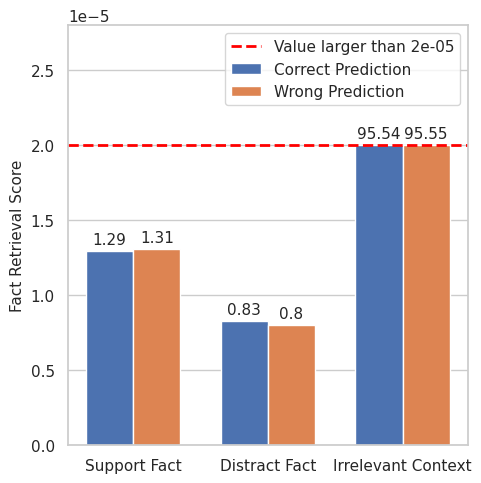

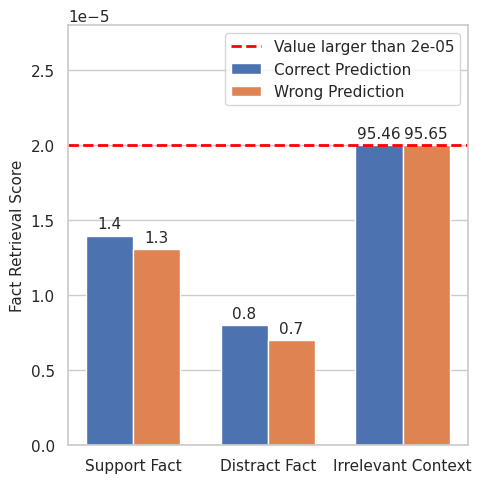

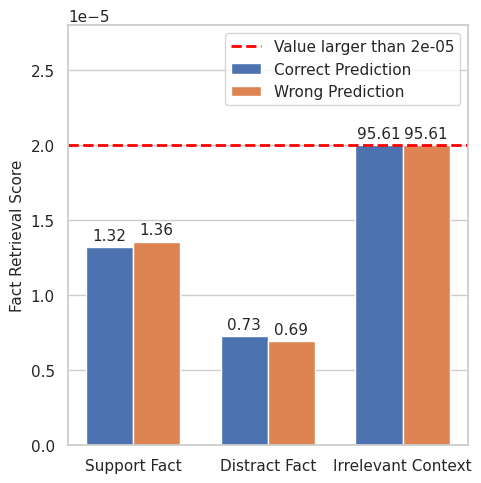

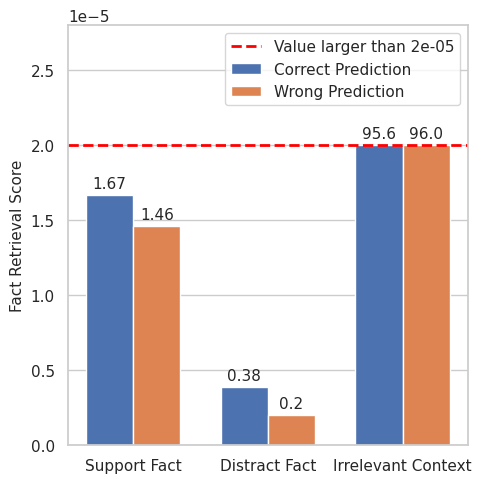

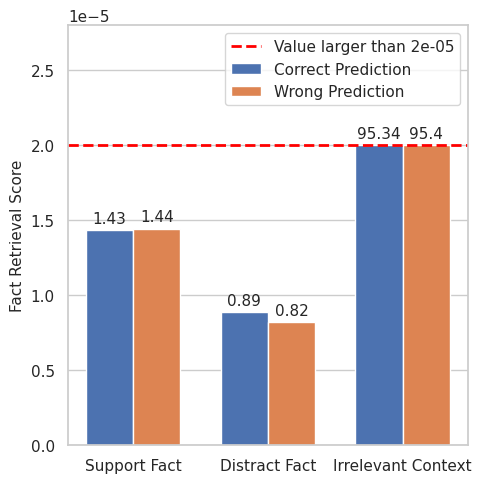

In [63]:
def statistic_attention_score(score_dict):
    """
    There are three types of attention scores:
    1. clue_pos
    2. attack_pos
    3. irrelevant_pos
    """
    succ_head_counter = score_dict['succ_head_counter']
    fail_head_counter = score_dict['fail_head_counter']

    success_clue_score = np.mean([x['clue_pos'] for x in succ_head_counter.values()])
    fail_clue_score = np.mean([x['clue_pos'] for x in fail_head_counter.values()])
    success_attack_score = np.mean([x['attack_pos'] for x in succ_head_counter.values()])
    fail_attack_score = np.mean([x['attack_pos'] for x in fail_head_counter.values()])
    success_irrelevant_score = np.mean([x['irrelevant_pos'] for x in succ_head_counter.values()])
    fail_irrelevant_score = np.mean([x['irrelevant_pos'] for x in fail_head_counter.values()])

    return success_clue_score, success_attack_score, success_irrelevant_score, fail_clue_score, fail_attack_score, fail_irrelevant_score


def draw(data, file_path=None):
    sns.set_theme(style="whitegrid")
    success_clue_score, success_attack_score, success_irrelevant_score, fail_clue_score, fail_attack_score, fail_irrelevant_score = data
    labels = ['Support Fact', 'Distract Fact', 'Irrelevant Context']

    y_upper_limit = 2e-5  # the upper limit of y-axis

    x = np.arange(len(labels))
    width = 0.35  # Êü±Áä∂ÂõæÁöÑÂÆΩÂ∫¶

    # ÁªòÂà∂Êü±Áä∂Âõæ
    fig, ax = plt.subplots(figsize=(5, 5))
    rects1 = ax.bar(x - width/2, list(map(lambda x: x if x < y_upper_limit else y_upper_limit, [success_clue_score, success_attack_score, success_irrelevant_score])), width, label='Correct Prediction')
    rects2 = ax.bar(x + width/2, list(map(lambda x: x if x < y_upper_limit else y_upper_limit, [fail_clue_score, fail_attack_score, fail_irrelevant_score])), width, label='Wrong Prediction')

    ax.set_ylim(0, 2.8e-5)  # set ylim
    ax.xaxis.grid(False)

    if max(data) > y_upper_limit:
        ax.axhline(y=y_upper_limit, color='red', linestyle='--', linewidth=2, label=f'Value larger than {y_upper_limit}')

    # Ê∑ªÂä†‰∏Ä‰∫õÊñáÊú¨Ê†áÁ≠æ„ÄÅÊ†áÈ¢òÂíåËá™ÂÆö‰πâxËΩ¥Ê†áÁ≠æ
    ax.set_ylabel('Fact Retrieval Score', fontsize=11)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=11)
    ax.legend(fontsize=11)
    ax.tick_params(axis='x', labelsize=11)  # ËÆæÁΩÆÊ®™ÂùêÊ†áÂ≠ó‰ΩìÂ§ßÂ∞è
    ax.tick_params(axis='y', labelsize=11)  # ËÆæÁΩÆÁ∫µÂùêÊ†áÂ≠ó‰ΩìÂ§ßÂ∞è
    # Âú®Êü±Áä∂Âõæ‰∏äÊòæÁ§∫Êï∞ÂÄº

    def autolabel(rects, score_list):
        for rect, score in zip(rects, score_list):
            ax.annotate('{}'.format(round(score / 1e-5, 2)),
                        xy=(rect.get_x() + rect.get_width() / 2, rect.get_height()),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=11)
    autolabel(rects1, [success_clue_score, success_attack_score, success_irrelevant_score])
    autolabel(rects2, [fail_clue_score, fail_attack_score, fail_irrelevant_score])
    fig.tight_layout()
    # plt.show()

    if file_path:
        plt.savefig(file_path)


for file in hop_files:
    save_file_name = os.path.join("/mnt/petrelfs/tangzecheng/MyRLHF/paper_figure/preliminary/fact_retrieval_score", f"{os.path.basename(file).split('.')[0]}.pdf")
    print(save_file_name)
    res = statistic_attention_score(auto_read_data(file))
    if os.path.basename(file).split('.')[0].split('-')[-1] == '0':
        res[2] = 0; res[-1] = 0   # for short context testing, it has no relevant long-context
    draw(res, save_file_name)

#### Áü≠ÊñáÊú¨‰∏äÁöÑmultihop reasoning

1.29
0.83
95.54
1.31
0.8
95.55


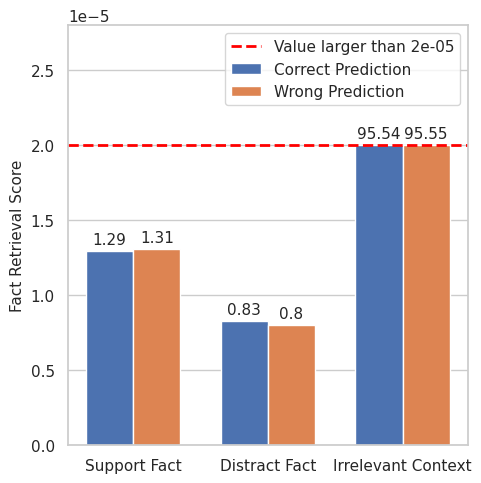

In [54]:
data = 1.67e-5, 0.38e-5, 0, 1.44e-5, 0.82e-5, 0

#### ÈïøÊñáÊú¨‰∏äÁöÑmultihop reasoning

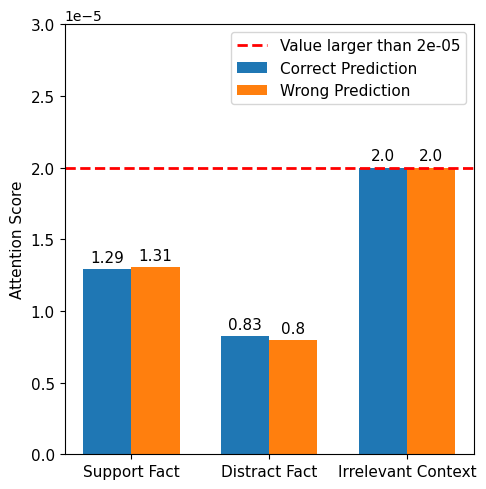

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="whitegrid")
success_clue_score, success_attack_score, success_irrelevant_score, fail_clue_score, fail_attack_score, fail_irrelevant_score = res
labels = ['Support Fact', 'Distract Fact', 'Irrelevant Context']

y_upper_limit = 2e-5  # the upper limit of y-axis

x = np.arange(len(labels))
width = 0.35  # Êü±Áä∂ÂõæÁöÑÂÆΩÂ∫¶

# ÁªòÂà∂Êü±Áä∂Âõæ
fig, ax = plt.subplots(figsize=(5, 5))
rects1 = ax.bar(x - width/2, list(map(lambda x: x if x < y_upper_limit else y_upper_limit, [success_clue_score, success_attack_score, success_irrelevant_score])), width, label='Correct Prediction')
rects2 = ax.bar(x + width/2, list(map(lambda x: x if x < y_upper_limit else y_upper_limit, [fail_clue_score, fail_attack_score, fail_irrelevant_score])), width, label='Wrong Prediction')

ax.set_ylim(0, 2.8e-5)  # set ylim
ax.xaxis.grid(False)
ax.axhline(y=y_upper_limit, color='red', linestyle='--', linewidth=2, label=f'Value larger than {y_upper_limit}')

# Ê∑ªÂä†‰∏Ä‰∫õÊñáÊú¨Ê†áÁ≠æ„ÄÅÊ†áÈ¢òÂíåËá™ÂÆö‰πâxËΩ¥Ê†áÁ≠æ
ax.set_ylabel('Fact Retrieval Score', fontsize=11)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=11)
ax.legend(fontsize=11)
ax.tick_params(axis='x', labelsize=11)  # ËÆæÁΩÆÊ®™ÂùêÊ†áÂ≠ó‰ΩìÂ§ßÂ∞è
ax.tick_params(axis='y', labelsize=11)  # ËÆæÁΩÆÁ∫µÂùêÊ†áÂ≠ó‰ΩìÂ§ßÂ∞è
# Âú®Êü±Áä∂Âõæ‰∏äÊòæÁ§∫Êï∞ÂÄº

def autolabel(rects, score_list):
    for rect, score in zip(rects, score_list):
        print(round(score / 1e-5, 2))
        ax.annotate('{}'.format(round(score / 1e-5, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, rect.get_height()),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=11)

autolabel(rects1, [success_clue_score, success_attack_score, success_irrelevant_score])
autolabel(rects2, [fail_clue_score, fail_attack_score, fail_irrelevant_score])

fig.tight_layout()

plt.show()

In [20]:
rects1[0].get_height()

1.2927349261076086e-05

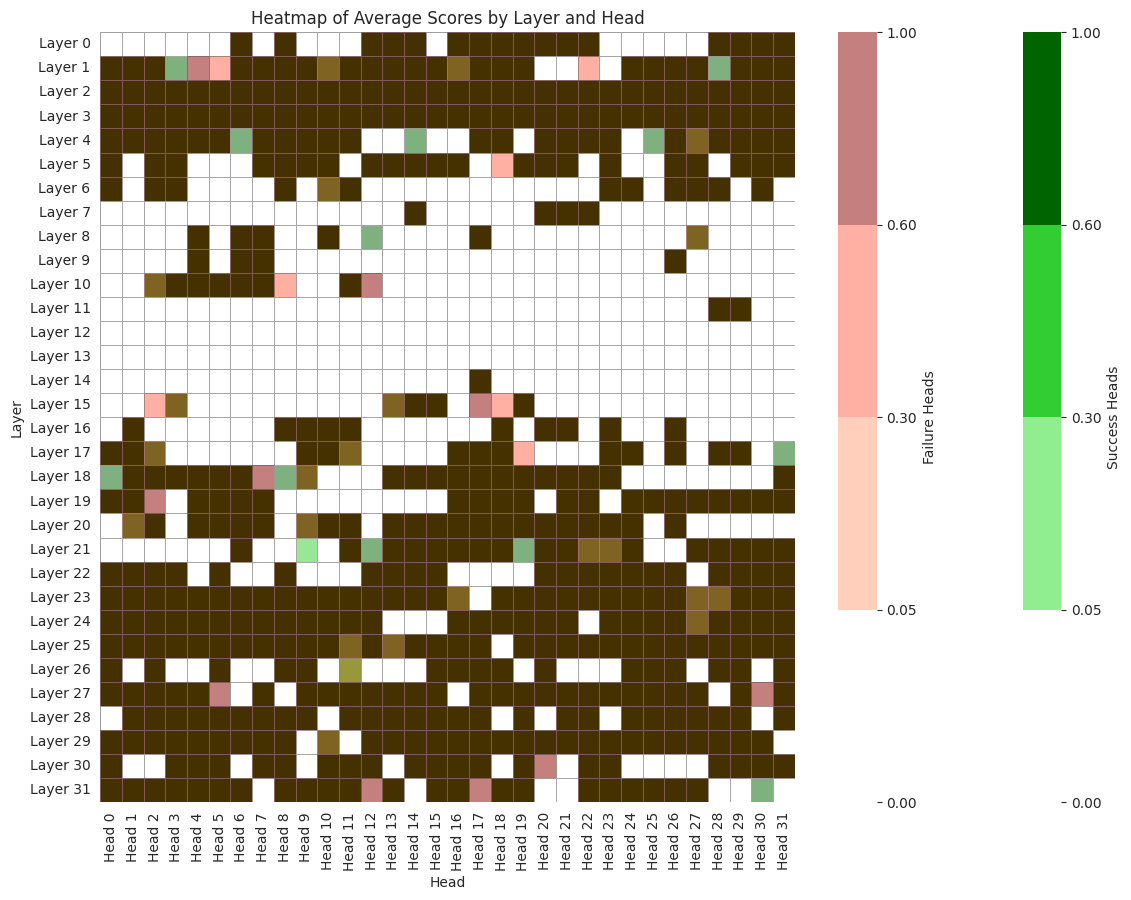

In [5]:
num_layers = 32
num_heads = 32
df_succ_scores = np.zeros((num_layers, num_heads))
df_fail_scores = np.zeros((num_layers, num_heads))

for key, values in succ_head_score.items():
    layer, head = map(int, key.split('-'))
    df_succ_scores[layer, head] = np.mean(values)

for key, values in fail_head_score.items():
    layer, head = map(int, key.split('-'))
    df_fail_scores[layer, head] = np.mean(values)

colors1 = ['#ffffff', '#90ee90', '#32cd32', '#006400']  # ÊµÖÁªø -> ‰∏≠Áªø -> Ê∑±Áªø
colors2 = ['#ffffff', '#ffa07a', '#ff6347', '#8b0000']  # ÊµÖÁ∫¢ -> ‰∏≠Á∫¢ -> Ê∑±Á∫¢
bounds = [0, 0.05, 0.3, 0.6, 1.0]  # ÂÆö‰πâËæπÁïå

# ÂàõÂª∫colormapÂíånorm
cmap1 = ListedColormap(colors1)
cmap2 = ListedColormap(colors2)
norm = BoundaryNorm(bounds, len(colors1))

# ËΩ¨Êç¢‰∏∫ DataFrame
df_succ_scores = pd.DataFrame(df_succ_scores, columns=[f'Head {i}' for i in range(num_heads)], 
                  index=[f'Layer {i}' for i in range(num_layers)])
df_fail_scores = pd.DataFrame(df_fail_scores, columns=[f'Head {i}' for i in range(num_heads)], 
                  index=[f'Layer {i}' for i in range(num_layers)])

sns.set_style("white")

fail_column_means = df_fail_scores.mean() # ËÆ°ÁÆóÊØèÂàóÁöÑÂπ≥ÂùáÂàÜ
succ_column_means = df_succ_scores.mean()

# ‰ΩøÁî®applyÂáΩÊï∞ÔºåÊ≤øÁùÄÂàóÁöÑÊñπÂêëÔºàaxis=0ÔºâÂ∫îÁî®‰∏Ä‰∏™ÂáΩÊï∞
# Ëøô‰∏™ÂáΩÊï∞‰ºöÊ£ÄÊü•ÊØè‰∏Ä‰∏™ÂÖÉÁ¥†ÔºåÂ¶ÇÊûúÂÖÉÁ¥†ÂÄº‰Ωé‰∫éÂÖ∂ÊâÄÂú®ÂàóÁöÑÂπ≥ÂùáÂàÜÔºåÈÇ£‰πàËØ•ÂÖÉÁ¥†ÂÄºÂ∞ÜË¢´ËÆæÁΩÆ‰∏∫0
df_succ_scores = df_succ_scores.apply(lambda x: [value if value >= succ_column_means[x.name] else 0 for value in x], axis=0)
df_fail_scores = df_fail_scores.apply(lambda x: [value if value >= fail_column_means[x.name] else 0 for value in x], axis=0)

succ_heads = df_succ_scores 
fail_heads = df_fail_scores 

# ÁªòÂà∂ÁÉ≠ÂäõÂõæ
plt.figure(figsize=(14, 10))

sns.heatmap(succ_heads, cmap=cmap1, norm=norm, alpha=1, cbar=True, 
            cbar_kws={'label': 'Success Heads'}, linewidths=0.5, linecolor='gray')

sns.heatmap(fail_heads, cmap=cmap2, norm=norm, alpha=0.5, cbar=True, 
            cbar_kws={'label': 'Failure Heads'}, linewidths=0.5, linecolor='gray')

plt.title('Heatmap of Average Scores by Layer and Head')
plt.xlabel('Head')
plt.ylabel('Layer')
plt.show()

In [5]:
succ_heads > succ_heads.mean()

Head 0  Head 1  Head 2  Head 3  Head 4  Head 5  Head 6  Head 7  \
Layer 0    False   False   False    True    True    True    True   False   
Layer 1    False   False    True   False   False   False   False   False   
Layer 2     True    True    True    True    True    True    True    True   
Layer 3     True    True    True    True    True    True    True    True   
Layer 4     True    True    True    True   False   False   False   False   
Layer 5    False   False   False   False   False   False   False   False   
Layer 6    False   False    True   False   False   False   False   False   
Layer 7    False   False   False   False   False   False   False   False   
Layer 8    False    True   False   False   False   False   False   False   
Layer 9    False   False   False   False   False   False   False    True   
Layer 10   False    True    True    True   False   False   False   False   
Layer 11   False   False   False   False   False   False   False   False   
Layer 12   False   False   False   False   False   False   False   False   
Layer 13    True    True   False    True    True    True    True   False   
Layer 14   False   False   False   False   False    True   False   False   
Layer 15   False    True   False    True   False   False   False   False   
Layer 16    True    True   False   False   False   False   False   False   
Layer 17    True   False   False   False   False   False   False   False   
Layer 18    True   False   False   False    True   False    True   False   
Layer 19    True   False    True    True   False   False   False   False   
Layer 20   False    True    True    True   False   False   False   False   
Layer 21   False    True    True   False   False   False   False   False   
Layer 22    True    True    True   False   False   False   False   False   
Layer 23   False   False   False   False   False    True    True    True   
Layer 24   False   False   False    True   False   False   False   False   
Layer 25   False   False   False   False    True    True    True    True   
Layer 26   False   False   False    True   False   False   False   False   
Layer 27   False   False   False   False    True    True    True    True   
Layer 28   False   False   False   False   False   False   False   False   
Layer 29   False   False   False   False   False   False   False   False   
Layer 30   False   False   False   False   False   False   False   False   
Layer 31   False   False   False   False   False   False   False   False   

          Head 8  Head 9  ...  Head 22  Head 23  Head 24  Head 25  Head 26  \
Layer 0     True    True  ...     True     True    False    False    False   
Layer 1    False   False  ...    False    False    False    False    False   
Layer 2     True    True  ...     True     True     True     True     True   
Layer 3    False    True  ...     True     True     True     True     True   
Layer 4    False   False  ...    False     True    False    False    False   
Layer 5     True    True  ...    False     True    False    False    False   
Layer 6    False   False  ...    False    False    False    False    False   
Layer 7    False   False  ...    False    False    False    False    False   
Layer 8    False   False  ...    False    False    False    False    False   
Layer 9    False   False  ...    False    False    False    False    False   
Layer 10   False   False  ...    False    False    False    False    False   
Layer 11   False   False  ...    False    False    False    False    False   
Layer 12   False   False  ...    False    False    False    False    False   
Layer 13   False    True  ...    False    False    False    False    False   
Layer 14   False   False  ...     True    False    False    False    False   
Layer 15   False   False  ...    False    False    False    False     True   
Layer 16    True    True  ...    False     True     True     True     True   
Layer 17   False   False  ...    False     True     True     True     True   
Layer 18    True   

‰∏ãÈù¢ÊòØÂàÜÊûêReasoning Head Âíå Retrieval Head ‰πãÈó¥ÁöÑÂÖ≥Á≥ª

In [ ]:
# head_reasoning_file = "/data/zecheng/acl2025/MyRLHF/RetrievalHead/reetrievalheaddetect/head_score/q3_inf_diff_pos/Meta-Llama-3.1-8B-Instruct.json"
# head_score_file = "/data/zecheng/acl2025/MyRLHF/RetrievalHead/reetrievalheaddetect/head_score/niah_retrieval/Meta-Llama-3.1-8B-Instruct.json"
head_reasoning_file = "/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/head_score/q3_inf_diff_pos/Qwen2.5-7B-Instruct.json"
head_score_file = "/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/head_score/niah_retrieval/Qwen2.5-7B-Instruct.json"
reason_scores = auto_read_data(head_reasoning_file)
retrieval_scores = auto_read_data(head_score_file)

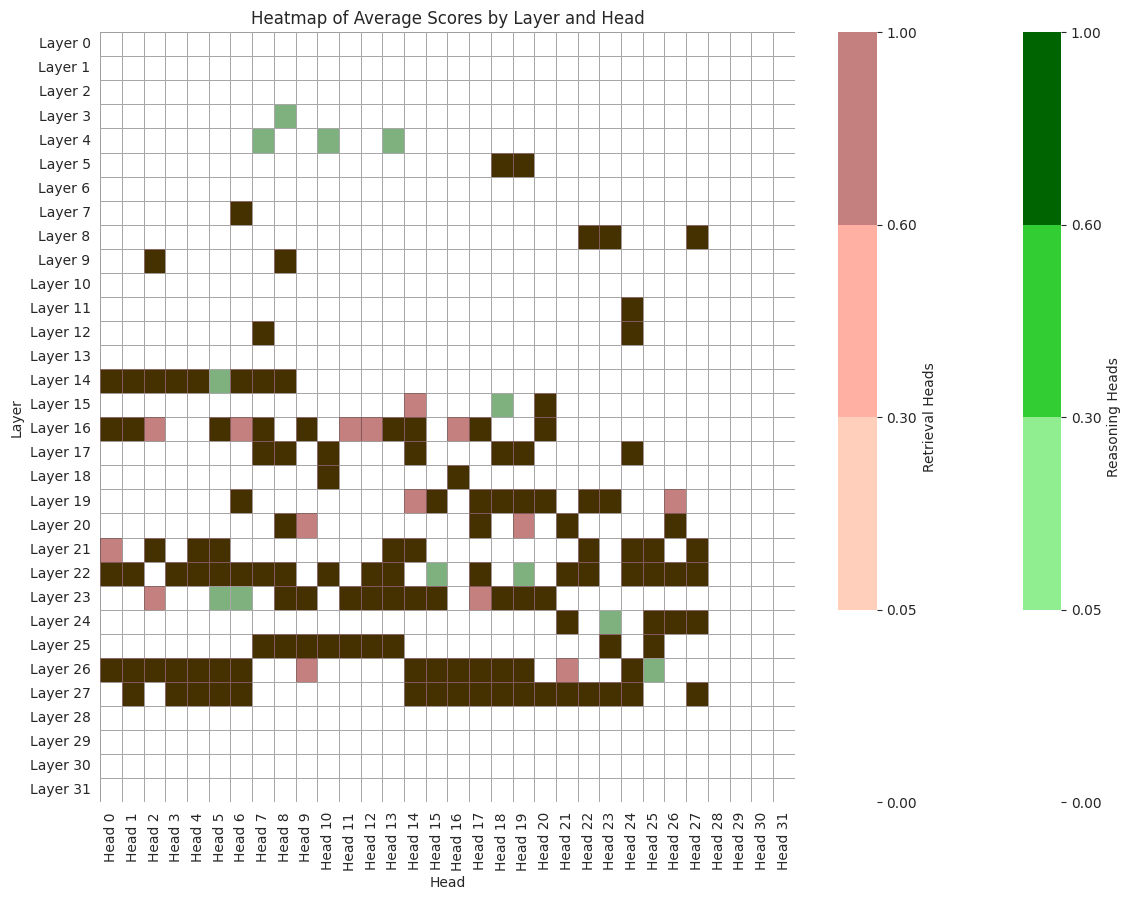

In [6]:
num_layers = 32
num_heads = 32
df_reason_scores = np.zeros((num_layers, num_heads))
df_retrieval_scores = np.zeros((num_layers, num_heads))

for key, values in reason_scores.items():
    layer, head = map(int, key.split('-'))
    df_reason_scores[layer, head] = np.mean(values)

for key, values in retrieval_scores.items():
    layer, head = map(int, key.split('-'))
    df_retrieval_scores[layer, head] = np.mean(values)

colors1 = ['#ffffff', '#90ee90', '#32cd32', '#006400']  # ÊµÖÁªø -> ‰∏≠Áªø -> Ê∑±Áªø
colors2 = ['#ffffff', '#ffa07a', '#ff6347', '#8b0000']  # ÊµÖÁ∫¢ -> ‰∏≠Á∫¢ -> Ê∑±Á∫¢
bounds = [0, 0.05, 0.3, 0.6, 1.0]  # ÂÆö‰πâËæπÁïå

# ÂàõÂª∫colormapÂíånorm
cmap1 = ListedColormap(colors1)
cmap2 = ListedColormap(colors2)
norm = BoundaryNorm(bounds, len(colors1))

# ËΩ¨Êç¢‰∏∫ DataFrame
df_reason_scores = pd.DataFrame(df_reason_scores, columns=[f'Head {i}' for i in range(num_heads)], 
                  index=[f'Layer {i}' for i in range(num_layers)])
df_retrieval_scores = pd.DataFrame(df_retrieval_scores, columns=[f'Head {i}' for i in range(num_heads)], 
                  index=[f'Layer {i}' for i in range(num_layers)])

sns.set_style("white")

reasoning_heads = df_reason_scores > 0.1
retrieval_heads = df_retrieval_scores > 0.1

# ÁªòÂà∂ÁÉ≠ÂäõÂõæ
plt.figure(figsize=(14, 10))

sns.heatmap(reasoning_heads, cmap=cmap1, norm=norm, alpha=1, cbar=True, 
            cbar_kws={'label': 'Reasoning Heads'}, linewidths=0.5, linecolor='gray')

sns.heatmap(retrieval_heads, cmap=cmap2, norm=norm, alpha=0.5, cbar=True, 
            cbar_kws={'label': 'Retrieval Heads'}, linewidths=0.5, linecolor='gray')

plt.title('Heatmap of Average Scores by Layer and Head')
plt.xlabel('Head')
plt.ylabel('Layer')
plt.show()

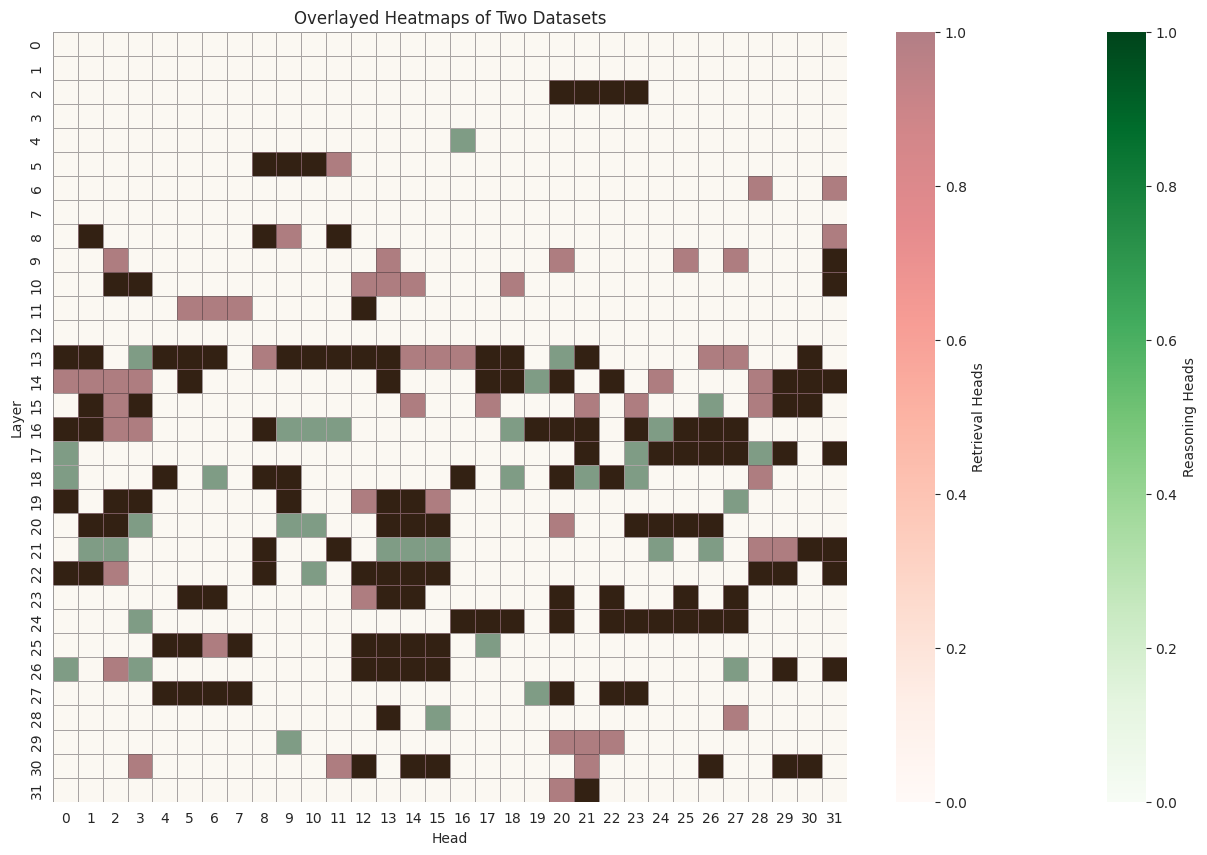

In [5]:
num_layers = 32
num_heads = 32
df_reason_scores = np.zeros((num_layers, num_heads))
df_retrieval_scores = np.zeros((num_layers, num_heads))

for key, values in reason_scores.items():
    layer, head = map(int, key.split('-'))
    df_reason_scores[layer, head] = np.mean(values)

for key, values in retrieval_scores.items():
    layer, head = map(int, key.split('-'))
    df_retrieval_scores[layer, head] = np.mean(values)

reasoning_heads = df_reason_scores > 0.1
retrieval_heads = df_retrieval_scores > 0.1

plt.figure(figsize=(16, 10))
sns.heatmap(reasoning_heads, cmap='Greens', alpha=1, cbar=True, 
            cbar_kws={'label': 'Reasoning Heads'}, linewidths=0.5, linecolor='gray')
sns.heatmap(retrieval_heads, cmap='Reds', alpha=0.5, cbar=True, 
            cbar_kws={'label': 'Retrieval Heads'}, linewidths=0.5, linecolor='gray')

plt.title('Overlayed Heatmaps of Two Datasets')
plt.xlabel('Head')
plt.ylabel('Layer')

plt.show()
